<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [51]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [58]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [59]:
df.head(100)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
95,Cameroon,96,131,106.0,129.0,129.0,90.0,120.0,91.0,121.0,141.0
96,Bulgaria,97,47,117.0,13.0,18.0,115.0,147.0,112.0,56.0,65.0
97,Ghana,98,129,92.0,72.0,132.0,91.0,117.0,52.0,114.0,121.0
98,Ivory Coast,99,134,88.0,130.0,137.0,100.0,62.0,114.0,118.0,147.0


In [64]:
df = df.fillna(0)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?  И то и другое это равномерное распределение

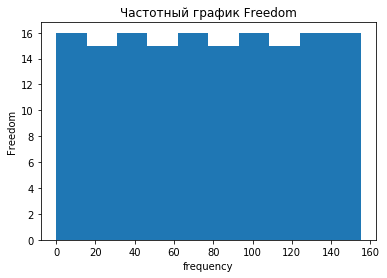

In [65]:
n, bins, patches = plt.hist(df['Freedom'])

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.show()

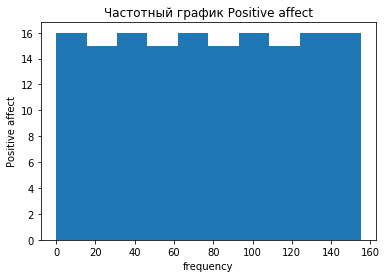

In [66]:
n, bins, patches = plt.hist(df['Positive affect'])

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect')
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [67]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  77.5


In [68]:
statistics.pstdev(df['Freedom'])

45.032395746469746

In [69]:
statistics.pvariance(df['Freedom'])

2027.9166666666667

In [70]:
min(df['Freedom'])

0.0

In [71]:
max(df['Freedom'])

155.0

In [72]:
Freedom_range = max(df['Freedom']) - min(df['Freedom'])
print(Freedom_range)

155.0


Почему нельзя найти моду?

In [0]:
Все значения уникальные и встречаются один раз

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента? Коэффициент говорит что Freedom и positive affect коррелируют между собой

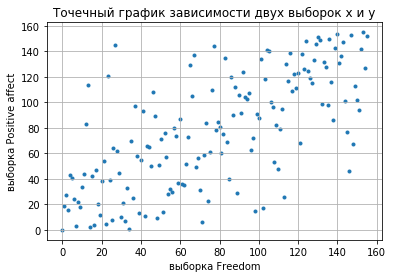

In [73]:
duration = df['Freedom']
avg_vote = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

In [74]:
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print(corr)

0.6878506740844935


Нормализовать данные колонки Freedom (централизация + масштабирование). Т.к. при централизации мы получили значение 0, данные можно не нормализовать. 

In [77]:
Freedom = df['Freedom']
print(statistics.mean(Freedom))

77.5


In [79]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [75]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,0.032258
1,0.038710
2,0.019355
3,0.045161
4,0.122581


Построить матрицу корреляций для всех колонок таблицы

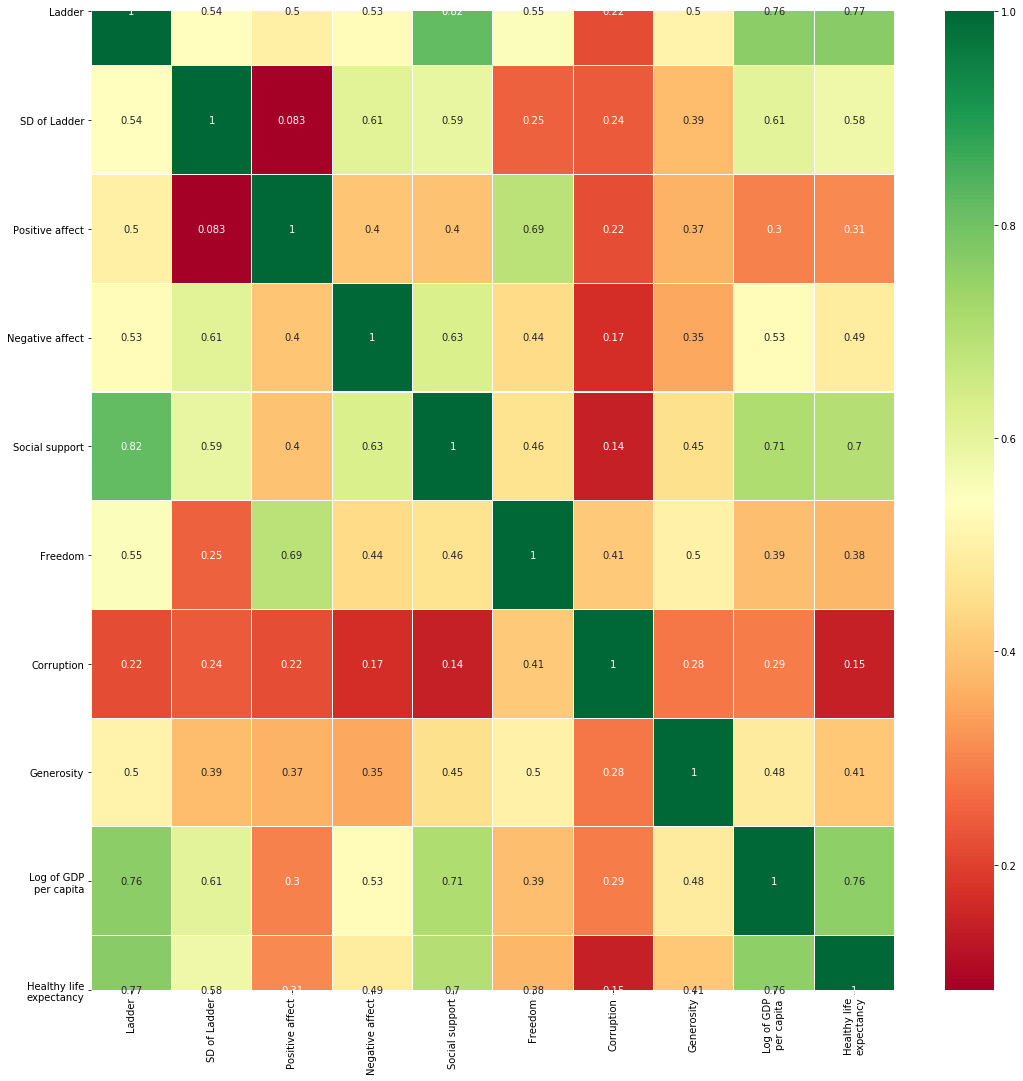

In [81]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(18,18)
plt.show()


Загрузить таблицу цен на авокадо: 

In [82]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение? Распределение не нормально.

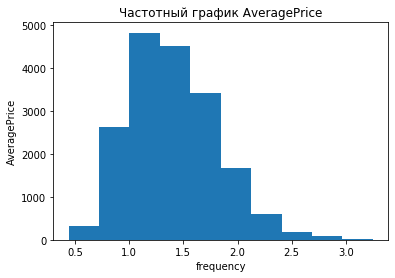

In [83]:
n, bins, patches = plt.hist(df['AveragePrice'])

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice')
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать? Корелляция обратная, колонки 4046, 4225 ,4770  слабо прямо корреклируют с колонкой AveragePrice

In [86]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print(corr)

-0.2083170484878848


In [87]:
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print(corr)

-0.1729277725093354


In [88]:
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print(corr)

-0.1794459839797562
